In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

df = pd.read_csv("GOOG.csv")
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], high=df["High"],
                                        low=df["Low"], close=df["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999903  0.999896  0.999774   0.999774 -0.471746
High       0.999903  1.000000  0.999875  0.999894   0.999894 -0.470766
Low        0.999896  0.999875  1.000000  0.999904   0.999904 -0.473027
Close      0.999774  0.999894  0.999904  1.000000   1.000000 -0.472017
Adj Close  0.999774  0.999894  0.999904  1.000000   1.000000 -0.472017
Volume    -0.471746 -0.470766 -0.473027 -0.472017  -0.472017  1.000000


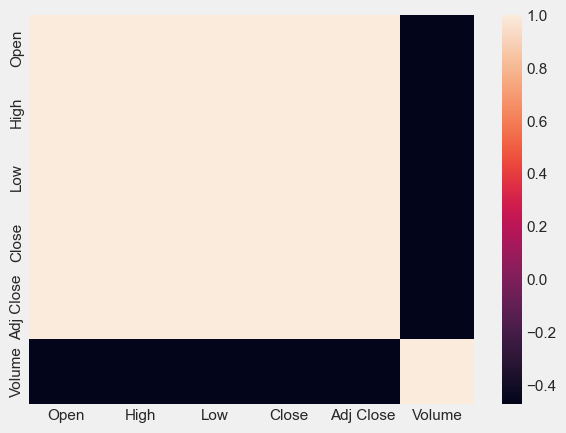

In [5]:
numerical_df = df.drop(columns=['Date'])
print(numerical_df.corr())
sns.heatmap(numerical_df.corr())
plt.show()

In [6]:
x = df[["Open", "High", "Low"]]
y = df["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
model.score(xtest, ytest)*100

99.97388544922097

In [9]:
model.score(xtrain, ytrain)*100

100.0

In [10]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0       15.510114
1      122.779999
2      114.681503
3       12.749462
4       56.739498


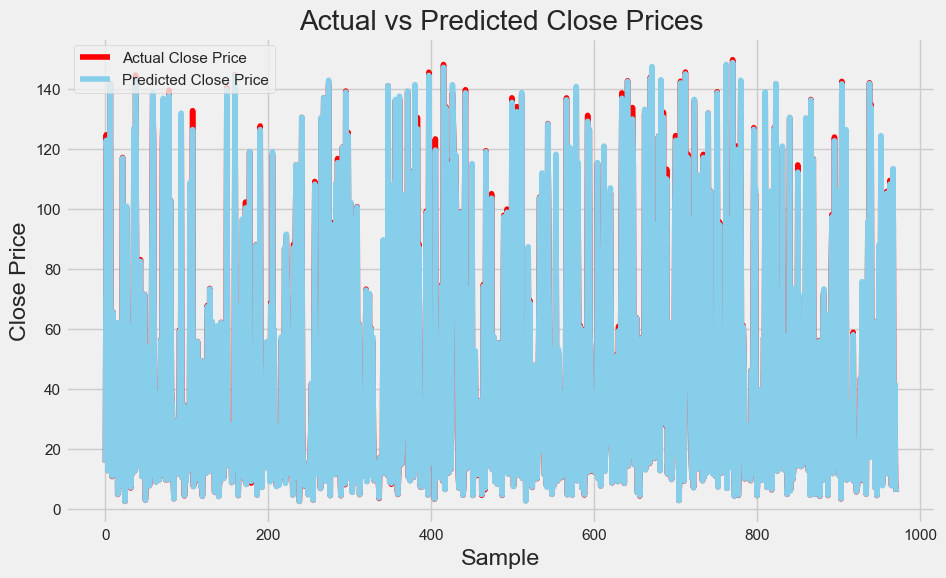

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(ytest, label='Actual Close Price', color='red')
plt.plot(ypred, label='Predicted Close Price', color='skyblue')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Sample')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.4091100142424599
R^2 Score: 0.9997388544922098


In [13]:
import joblib

# suppose your trained model is named 'model'
joblib.dump(model, "google_stock_model.pkl")
print("Model saved successfully!")


Model saved successfully!
